In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [79]:
sns.set(style='white', context='notebook', palette='deep')

In [83]:
train =pd.read_csv("K:\\TensorflowPY36CPU\\TensorflowPY36CPU\\_8_TensorFlowBasics\\Kaggle\\MNIST_example\\train.csv")

In [86]:
test = pd.read_csv("K:\\TensorflowPY36CPU\\TensorflowPY36CPU\\_8_TensorFlowBasics\\Kaggle\\MNIST_example\\test.csv")

In [86]:
Y_train = train["label"]

In [87]:
X_train = train.drop("label",axis=1)

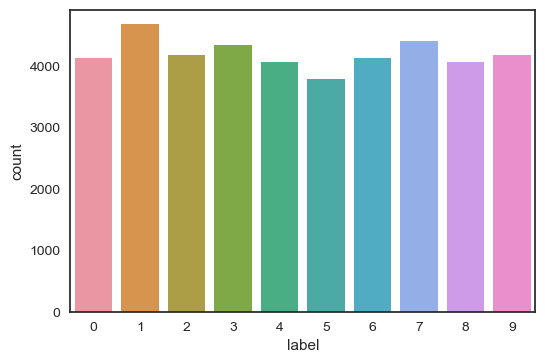

In [88]:
g = sns.countplot(Y_train)

In [89]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [90]:
X_train.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [91]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

#No Missing Value

#Normalization

In [92]:
X_train = X_train /255.0
test =test/255.0


#Resharpe


In [93]:
X_train  = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)


#label Encoding

In [94]:
Y_train = to_categorical(Y_train,num_classes=10)

In [95]:
print(Y_train)


[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


In [97]:
random_seed= 12
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

#see examples

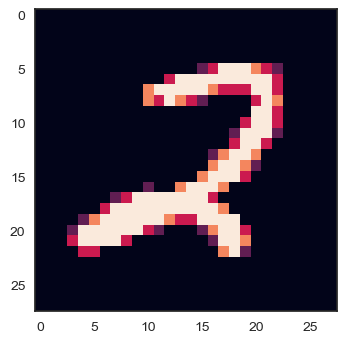

In [98]:
g = plt.imshow(X_train[0][:,:,0])

In [99]:
model = Sequential() #

In [100]:
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))

In [101]:
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu'))

In [102]:
model.add(MaxPool2D(pool_size=(2,2)))

In [103]:
model.add(Dropout(0.25))

In [104]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))

In [105]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))

In [106]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [107]:
model.add(Dropout(0.25))

In [108]:
model.add(Flatten())

In [109]:
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [110]:
optimizer = RMSprop(lr=0.001,rho=0.9,epsilon=1e-8,decay=0.0)

In [111]:
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [112]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3,verbose=1,factor=0.5,min_lr=1e-5)

In [113]:
epochs =30
batch_size = 86

In [114]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [115]:
datagen.fit(X_train)

In [ ]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val),verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

NameError: name 'learning_rate_reduction' is not defined